# MO433 - Introdução ao Processamento Digital de Imagem: Trabalho 04

Professor: Hélio Pedrini

Aluno: Gabriel Ayres de Oliveira

Nesse trabalho serão exploradas duas análises de textura:
- Padrões Binários Locais
- Matrizes de coocorrência

### Carregando bibliotecas e inicializando variáveis comuns

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import ndimage
from google.colab.patches import cv2_imshow as cv_imshow

#Essa variável define se o código está sendo executado em notebook ou não,
#de modo que possa ser convertido em um script facilmente.

notebook = True

In [ ]:
if(notebook):
  #Carregando imagens para fins de teste
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_textura/textura1.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_textura/textura2.png
  !wget  -nc -q https://www.ic.unicamp.br/~helio/imagens_textura/textura3.png

  img1 = cv.imread("textura1.png")
  img2 = cv.imread("textura2.png")
  img3 = cv.imread("textura3.png")
  #img4 = cv.imread("textura4.png")

  images = np.empty([0,img1.shape[0],img1.shape[1], img1.shape[2]], dtype=np.uint8)
  images = np.concatenate((images, img1[np.newaxis,:,:,:]))
  images = np.concatenate((images, img2[np.newaxis,:,:,:]))
  images = np.concatenate((images, img3[np.newaxis,:,:,:]))
  #images = np.concatenate((images, img4[np.newaxis,:,:,:]))

In [ ]:
if(not notebook):
  try:
    arquivo = sys.argv[1]
    img = cv.imread(arquivo) 
  except:
    print("Sintaxe: trabalho03.py  filename")

## Conversão da imagem em escala de cinza

Nessa seção será feita a conversão da imagem em escala de cinza. É interessante salientar que o OpenCV carrega as imagens por padrão em BGR, enquanto o matplotlib se utiliza do padrão RGB, assim caso queira-se mostrar imagens carregadas por um em outro as conversões devem ser feitas de acordo ou as cores da imagem resultante não serão as corretas devido aos canais trocados. São mostradas então as imagens em escala de cinza e binarizada.

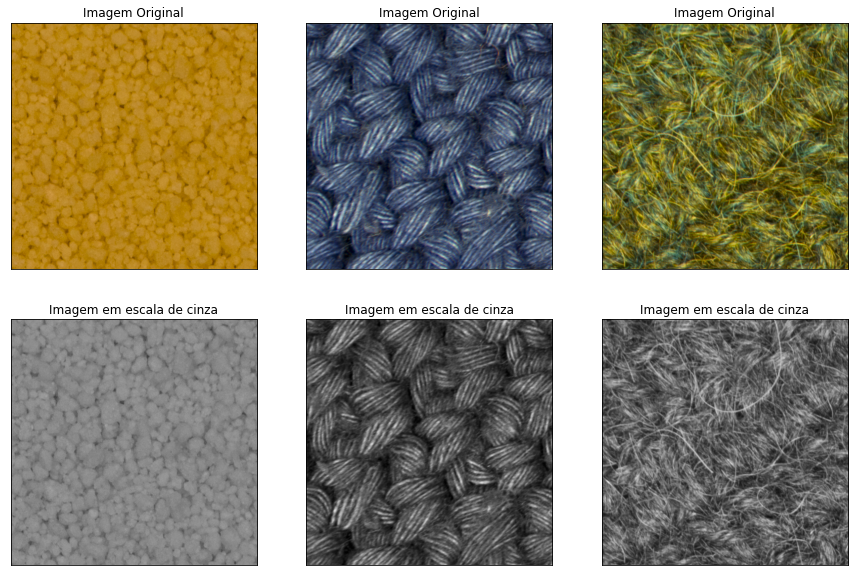

In [ ]:
#Convertendo em escala de cinza
images_grayscale = np.empty([0,img1.shape[0],img1.shape[1]], dtype=np.uint8)

for i in range(images.shape[0]):
  img_grayscale = cv.cvtColor(images[i,:,:,:], cv.COLOR_BGR2GRAY)
  cv.imwrite("image" + str(i) + "_grayscale" + ".png", img_grayscale)
  images_grayscale = np.concatenate((images_grayscale, img_grayscale[np.newaxis,:,:]))



if(notebook):
  plt.figure(figsize=[15,10])
  
  for i in range(images_grayscale.shape[0]):
    plt.subplot(2,3,1 +i)
    plt.imshow(cv.cvtColor(images[i,:,:,:], cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem Original")

    plt.subplot(2,3,4 +i)
    plt.imshow(cv.cvtColor(images_grayscale[i,:,:], cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem em escala de cinza")




##Análise de Padrões Binários Locais

In [ ]:
from skimage.feature import local_binary_pattern

images_lbp1 = np.empty([0,img1.shape[0],img1.shape[1]], dtype=np.uint8)
images_lbp2 = np.empty([0,img1.shape[0],img1.shape[1]], dtype=np.uint8)
images_lbp3 = np.empty([0,img1.shape[0],img1.shape[1]], dtype=np.uint8)

radius = 1
n_points = 8 * radius

radii = 3
radii_step = 2

images_lbp = np.empty([0,0,img1.shape[0],img1.shape[1]], dtype=np.uint8)

#calculando o LBP para as três imagens para diferentes raios

for i in range(radii):
  radius = (i*radii_step)+1
  n_points = 8 
  img_lbp1 = (local_binary_pattern(images_grayscale[0,:,:], n_points, radius * i+1))
  img_lbp2 = (local_binary_pattern(images_grayscale[1,:,:], n_points, radius * i+1))
  img_lbp3 = (local_binary_pattern(images_grayscale[2,:,:], n_points, radius * i+1))

  img_lbp1 = (img_lbp1 + np.abs(img_lbp1.min()))/(np.abs(img_lbp1.min()) + img_lbp1.max()) * 255
  img_lbp2 = (img_lbp2 + np.abs(img_lbp2.min()))/(np.abs(img_lbp2.min()) + img_lbp2.max()) * 255
  img_lbp3 = (img_lbp3 + np.abs(img_lbp3.min()))/(np.abs(img_lbp3.min()) + img_lbp3.max()) * 255

  img_lbp1 = img_lbp1.astype(np.uint8)
  img_lbp2 = img_lbp2.astype(np.uint8)
  img_lbp3 = img_lbp3.astype(np.uint8)

  images_lbp1 = np.concatenate((images_lbp1, img_lbp1[np.newaxis,:,:]))
  images_lbp2 = np.concatenate((images_lbp2, img_lbp2[np.newaxis,:,:]))
  images_lbp3 = np.concatenate((images_lbp3, img_lbp3[np.newaxis,:,:]))

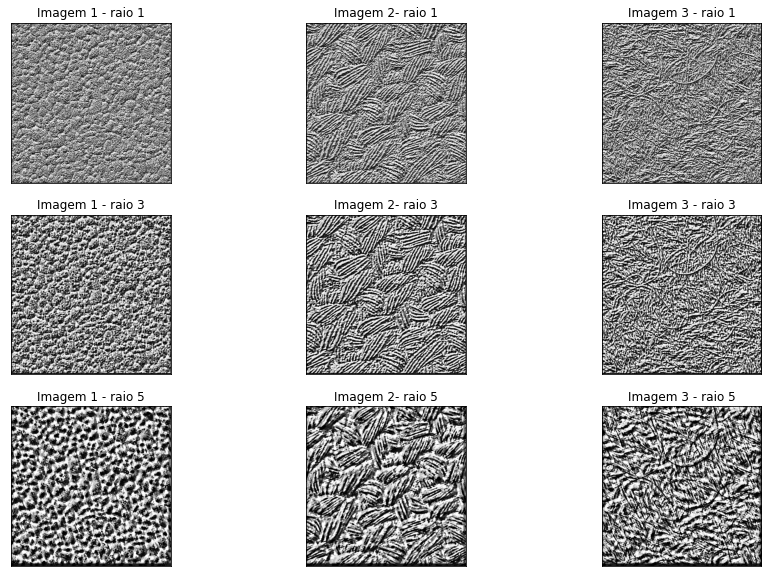

In [ ]:
if(notebook):
  plt.figure(figsize=[15,10])
  for i in range(radii):
    radius = (i*radii_step)+1
    plt.subplot(3,3,1 + (3*i))
    plt.imshow(images_lbp1[i,:,:], cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem 1 - raio %d" %radius)

    plt.subplot(3,3,2 + (3*i))
    plt.imshow(images_lbp2[i,:,:], cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem 2- raio %d" %radius)

    plt.subplot(3,3,3 + (3*i))
    plt.imshow(images_lbp3[i,:,:], cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem 3 - raio %d" %radius)
    
  plt.show()

### Histogramas dos resultados

Utilizando aqui de somente da imagem de raio 1 e 8 pontos mostra-se os histogramas dessas matrizes.





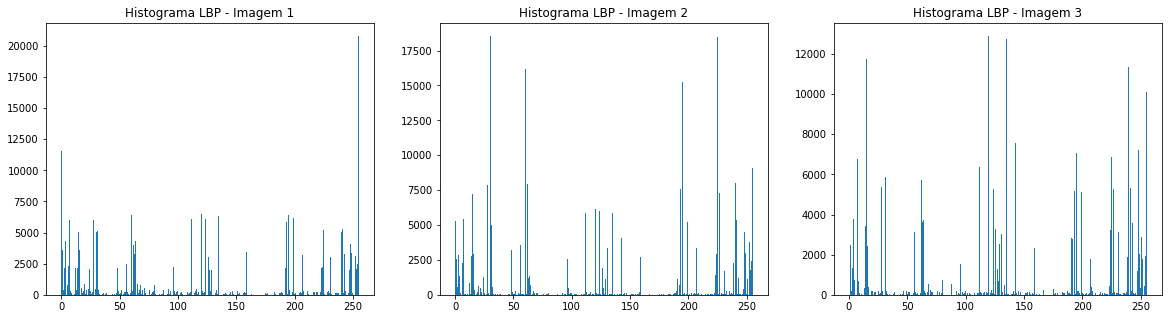

In [ ]:
 e s

## Análise por matriz de coocorrência

In [ ]:
from tabulate import tabulate
from skimage.feature.texture import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

img_glcm1 = greycomatrix(images_grayscale[0,:,:],distances=[1], angles=[np.pi/2])
img_glcm2 = greycomatrix(images_grayscale[1,:,:],distances=[1], angles=[np.pi/2])
img_glcm3 = greycomatrix(images_grayscale[2,:,:],distances=[1], angles=[np.pi/2])

img1_props = np.zeros([4])
img2_props = np.zeros([4])
img3_props = np.zeros([4])
img4_props = np.zeros([4])

img1_props[0] = greycoprops(img_glcm1, prop= 'ASM')
img1_props[1] = greycoprops(img_glcm1, prop= 'contrast')
img1_props[2] = shannon_entropy(img_glcm1)

img2_props[0] = greycoprops(img_glcm2, prop= 'ASM')
img2_props[1] = greycoprops(img_glcm2, prop= 'contrast')
img2_props[2] = shannon_entropy(img_glcm2)

img3_props[0] = greycoprops(img_glcm3, prop= 'ASM')
img3_props[1] = greycoprops(img_glcm3, prop= 'contrast')
img3_props[2] = shannon_entropy(img_glcm3)

print(tabulate([['1',img1_props[0],img1_props[1],img1_props[2]], ['2',img2_props[0],img2_props[1],img2_props[2]], ['3',img3_props[0],img3_props[1],img3_props[2]]], headers=['Image','ASM', 'Contrast', 'Entropy']))


  Image          ASM    Contrast    Entropy
-------  -----------  ----------  ---------
      1  0.00261242      15.9545   0.512092
      2  0.000353911     90.1364   1.49726
      3  0.000254219    130.317    1.5582


## Comparação entre Imagens de Textura

In [ ]:
def compare_images(image1, image2):
  from tabulate import tabulate
  from skimage.feature.texture import greycomatrix, greycoprops
  from skimage.measure import shannon_entropy
  from skimage.feature import local_binary_pattern
  import numpy as np
  import cv2 as cv
  import matplotlib.pyplot as plt
  from scipy import ndimage


  size = [10,4]
  #Conversão das Imagens
  image1_grayscale = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
  image2_grayscale = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

  radius = 3
  n_points = 8
  
  image1_lbp = local_binary_pattern(image1_grayscale, n_points, radius)
  image2_lbp = local_binary_pattern(image2_grayscale, n_points, radius)

  image1_lbp = (image1_lbp + np.abs(image1_lbp.min()))/(np.abs(image1_lbp.min()) + image1_lbp.max()) * 255
  image2_lbp = (image2_lbp + np.abs(image2_lbp.min()))/(np.abs(image2_lbp.min()) + image2_lbp.max()) * 255

  image1_lbp = image1_lbp.astype(np.uint8)
  image2_lbp = image2_lbp.astype(np.uint8)

  x_hist = np.arange(0,256)

  image1_hist = cv.calcHist(image1_lbp,[0],None,[256],[0,256])
  image2_hist = cv.calcHist(image2_lbp,[0],None,[256],[0,256])

  comp_chisqr = cv.compareHist(image1_hist, image2_hist, 1) 

  print("Distância qui-quadrado entre os histogramas 1 e 2: %d" %comp_chisqr)
  print("")

  image1_glcm = greycomatrix(image1_grayscale, distances=[1], angles=[np.pi/2])
  image2_glcm = greycomatrix(image2_grayscale, distances=[1], angles=[np.pi/2])

  image1_props = np.zeros([4])
  image2_props = np.zeros([4])


  image1_props[0] = greycoprops(image1_glcm, prop= 'ASM')
  image1_props[1] = greycoprops(image1_glcm, prop= 'contrast')
  image1_props[2] = shannon_entropy(image1_glcm)

  image2_props[0] = greycoprops(image2_glcm, prop= 'ASM')
  image2_props[1] = greycoprops(image2_glcm, prop= 'contrast')
  image2_props[2] = shannon_entropy(image2_glcm)


  print(tabulate([['Imagem 1', image1_props[0], image1_props[1], image1_props[2]], ['Imagem 2', image2_props[0], image2_props[1], image2_props[2]]], headers=['Image','ASM', 'Contrast', 'Entropy']))
  print("")

  #mostrando as imagens
  if(notebook):

    #Mostrando as imagens originais
    plt.figure(figsize=[10,15])
    plt.subplot(3,2,1)
    plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem 1")

    plt.subplot(3,2,2)
    plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Imagem 2")

    #Mostrando as imagens em escala de cinza
    plt.subplot(3,2,3)
    plt.imshow(cv.cvtColor(image1_grayscale, cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Escala de Cinza: Imagem 1")

    plt.subplot(3,2,4)
    plt.imshow(cv.cvtColor(image2_grayscale, cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title("Escala de Cinza: Imagem 2")

    #Mostrando o LBP das imagens
    plt.subplot(3,2,5)
    plt.imshow(image1_lbp, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("LBP: Imagem 1")

    plt.subplot(3,2,6)
    plt.imshow(image2_lbp, cmap="gray")
    plt.xticks([]), plt.yticks([])
    plt.title("LBP: Imagem 2")

    plt.savefig('comparisons.png')
    plt.show()

    plt.figure(figsize=size)
    plt.subplot(1,2,1)
    plt.title("Histograma LBP: Imagem 1")
    plt.bar(x_hist, image1_hist.reshape([256]))

    plt.subplot(1,2,2)
    plt.title("Histograma LBP: Imagem 2")
    plt.bar(x_hist, image2_hist.reshape([256]))
    plt.savefig('comparisons_hist.png')
    plt.show()
  
  return 0

### Comparação grama e tijolos

Distância qui-quadrado entre os histogramas 1 e 2: 5490

Image             ASM    Contrast    Entropy
--------  -----------  ----------  ---------
Imagem 1  5.36588e-05    1817.75     3.20011
Imagem 2  0.000459474     247.767    1.82133



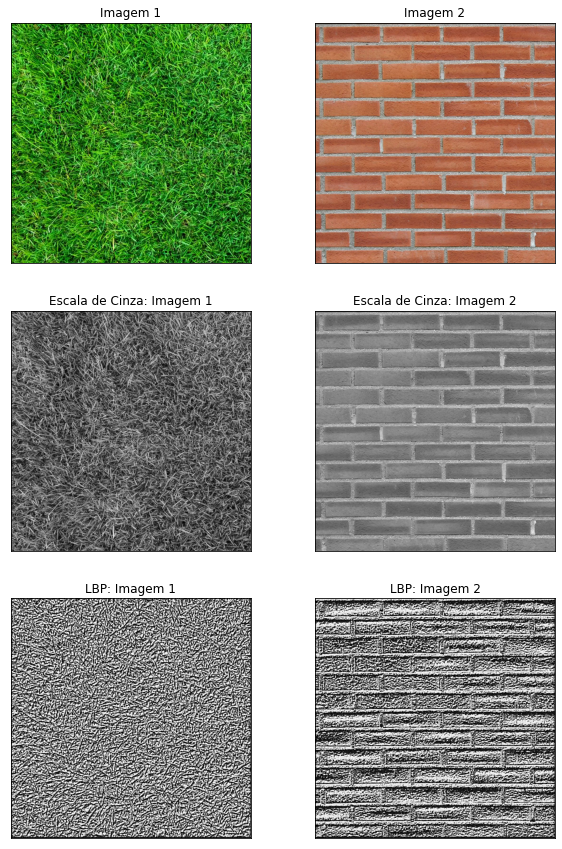

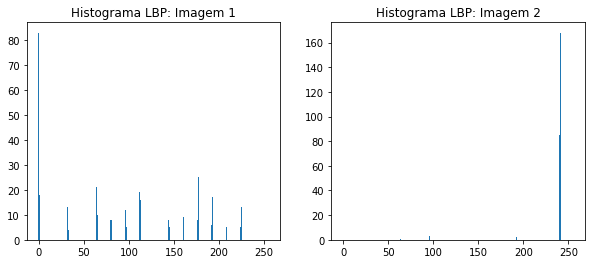

0

In [ ]:
grama = cv.imread("grama.png")
tijolos1 = cv.imread("tijolos2.png")
compare_images(grama,tijolos1)

### Comparação tijolos e tijolos

Distância qui-quadrado entre os histogramas 1 e 2: 3687

Image             ASM    Contrast    Entropy
--------  -----------  ----------  ---------
Imagem 1  0.000214318     277.917    2.16485
Imagem 2  0.000459474     247.767    1.82133



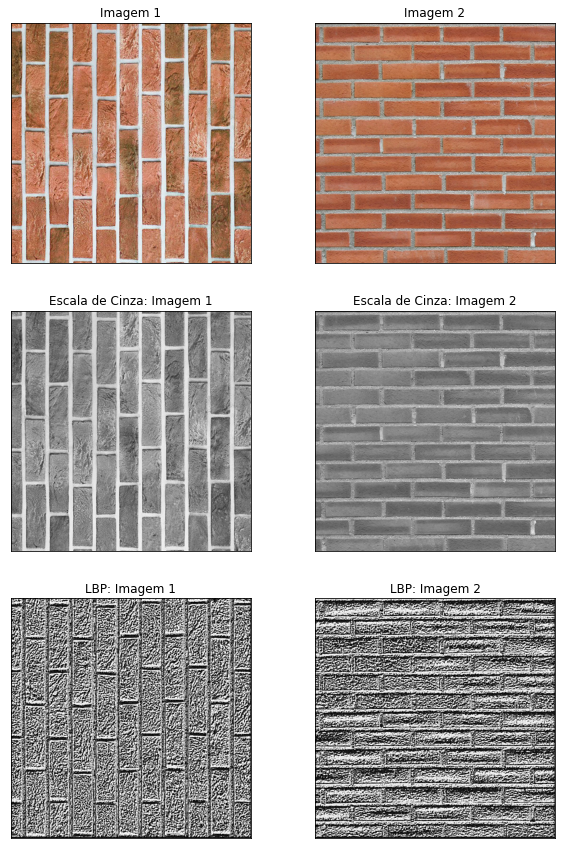

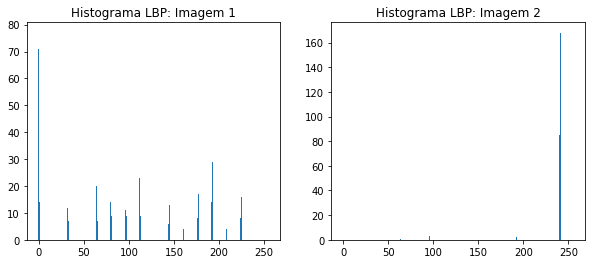

0

In [ ]:
tijolos1 = cv.imread("tijolos3.png")
tijolos2 = cv.imread("tijolos2.png")
compare_images(tijolos1, tijolos2)

### Comparação grama e areia

Distância qui-quadrado entre os histogramas 1 e 2: 176

Image             ASM    Contrast    Entropy
--------  -----------  ----------  ---------
Imagem 1  5.36588e-05   1817.75     3.20011
Imagem 2  0.00087353      63.2194   0.793801



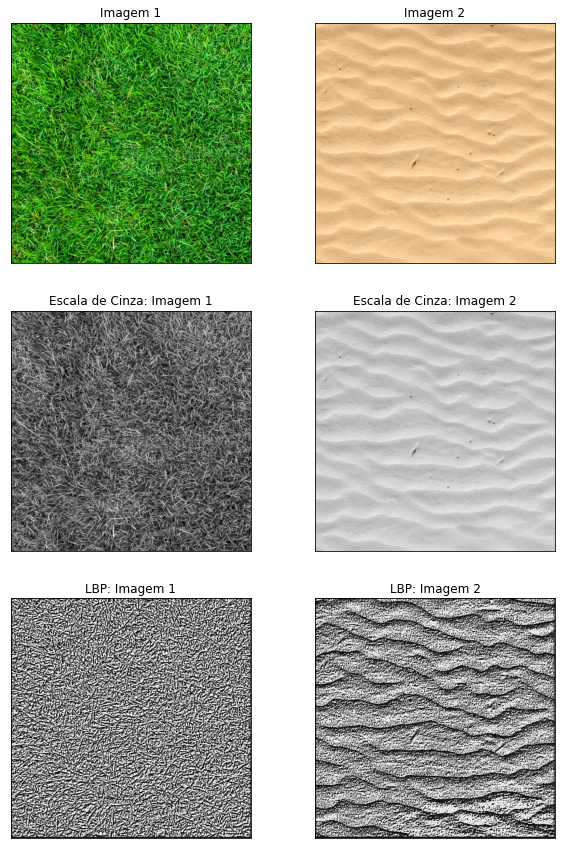

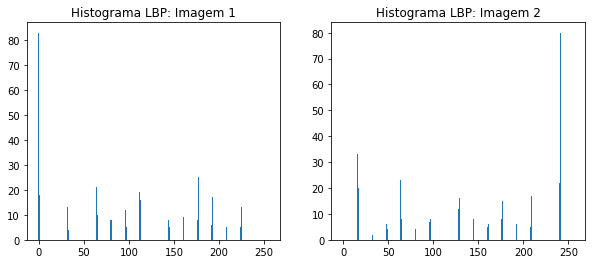

0

In [ ]:
grama = cv.imread("grama.png")
areia1 = cv.imread("areia1.png")
compare_images(grama,areia1)

### Comparação areia e areia

Distância qui-quadrado entre os histogramas 1 e 2: 66

Image             ASM    Contrast    Entropy
--------  -----------  ----------  ---------
Imagem 1  0.000678765     80.7735   0.837295
Imagem 2  0.00087353      63.2194   0.793801



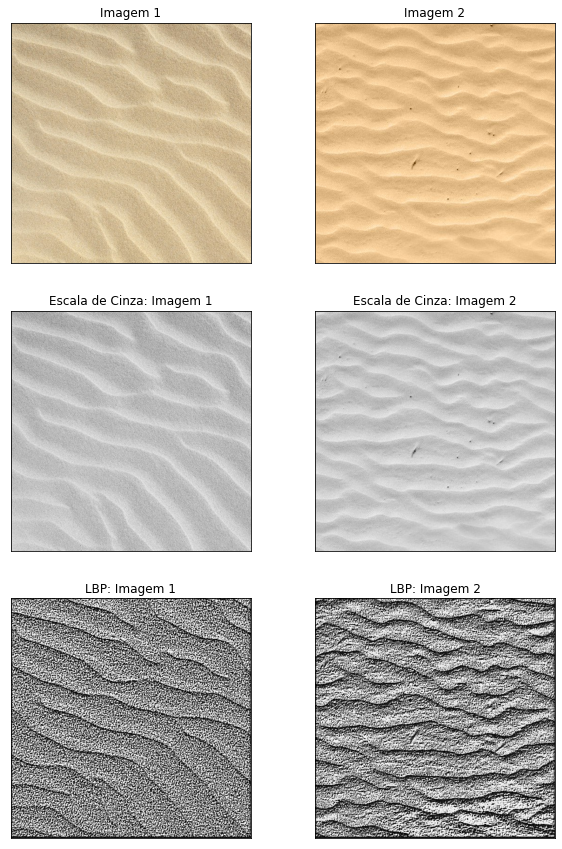

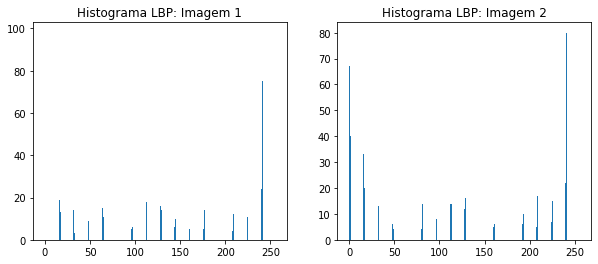

0

In [ ]:
areia1 = cv.imread("areia1.png")
areia2 = cv.imread("areia2.png")
compare_images(areia2, areia1)